In [1]:
import networkx as nx
import dwave_networkx as dnx
import random
import matplotlib.pyplot as plt
import pulp
import numpy as np

from lpSolver import solve
from uccgGenerator import tree_insertion, Graph
from plotNetwork import plotCoupling, plotGraphColoring
from networkx.algorithms.approximation.treewidth import treewidth_min_fill_in

In [2]:
v_color = "v_color"

In [3]:
def is_valid(g):
    for u, v in g.edges:
        if g.nodes[u]['color'] == g.nodes[v]['color']:
            return False
    return True

In [4]:
def get_available_colors(g, u, colors):
    used_colors = [g.nodes[v]['color'] for v in g.neighbors(u)]
    available = colors - set(used_colors)
    return available

In [5]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [6]:
def get_colors(g):
    tw, _ = treewidth_min_fill_in(g)
    num_colors = 2*tw
    cmap = get_cmap(num_colors)
    return {cmap(i) for i in range(num_colors)}

In [24]:
def random_walk(g, colors):
    v = random.sample(g.nodes, 1)[0]
    used_colors = {g.nodes[u][v_color] for u in g.neighbors(v)}
    c = random.sample(colors-used_colors, 1)[0]
    g.nodes[v][v_color] = c

In [25]:
def is_valid_coloring(g):
    for u, v in g.edges:
        if g.nodes[u][v_color] == g.nodes[v][v_color]:
            return False
    return True

In [56]:
g = tree_insertion(20, 40)
colors = get_colors(g)

g1 = nx.Graph(g)

for u in g1:
    g1.nodes[u][v_color] = c
for u in g1:
    used_colors = {g1.nodes[v][v_color] for v in g1.neighbors(u)}
    c = random.sample(colors-used_colors, 1)[0]
    g1.nodes[u][v_color] = c

g2 = nx.Graph(g1)
for _ in range(100):
    random_walk(g2, colors)

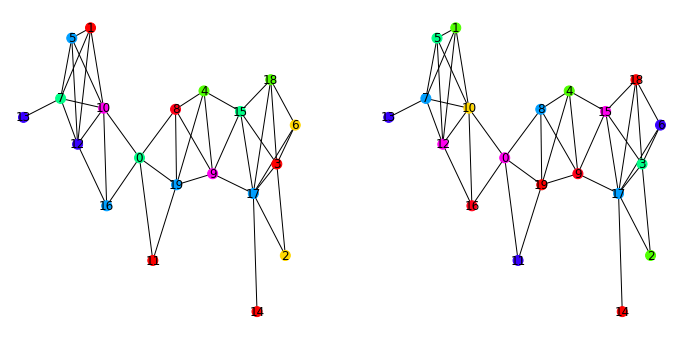

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plotGraphColoring(g1)
plt.subplot(1,2,2)
plotGraphColoring(g2)

In [ ]:
g1 = g1